# Chapter 10. Introduction to Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

1. [Setup](#setup)<a name="setup_top"></a>
2. [From Biological to Artificial Neurons](#2.0)<a name="2.0_top"></a>
    * 2.1 [Biological Neurons](#2.1)
    * 2.2 [Logical Computations with Neurons](#2.2)
    * 2.3 [The Perception](#2.3)
    * 2.4 [The Multilayer Perceptron and Backpropagation](#2.4)
    * 2.5 [Regression MLPs](#2.5)
    * 2.6 [Classification MLPs](#2.6)
3. [Implementing MLPs with Keras](#3.0)<a name="3.0_top"></a>
    * 3.1 [Installing Tensorflow 2](#3.1)
    * 3.2 [Building an Image Classifier Using the Sequential API](#3.2)
    * 3.3 [Building a Regression MLP Using the Sequential API](#3.3)
    * 3.4 [Building Complex Models Using the Functional API](#3.4)
        - 3.4.1 [Standard Model](#3.4.1)
        - 3.4.2 [Multiple Inputs Model](#3.4.2)
        - 3.4.3 [Multiple Outputs Model, add Auxiliary Output for Regularization](#3.4.3)
    * 3.5 [Using the Subclassing API to Build Dynamic Models](#3.5)
    * 3.6 [Saving and Restoring a Model](#3.6)
        - 2.6.1 [Saving a Model](#3.6.1)
        - 2.6.2 [Restoring a Model](#3.6.2)
    * 3.7 [Using Callbacks](#3.7)
        - 2.7.1 [ModelCheckpoint callback](#3.7.1)
        - 2.7.2 [EarlyStopping callback](#3.7.2)
        - 2.7.3 [Custom callback](#3.7.3)
    * 3.8 [Using TensorBoard for Visualization](#3.8)
4. [Fine-Tuning Neural Network Hyperparameters](#4.0)<a name="4.0_top"></a>
    * 4.1 [Grid search using KerasRegressor](#4.1)
    * 4.2 [Randomized search using RandomizedSearchCV](#4.2)
    * 4.3 [Number of Hidden Layers](#4.3)
    * 4.4 [Number of Neurons per Hidden Layer](#4.4)
    * 4.5 [Learning Rate, Batch Size, and Other Hyperparameters](#4.5)
5. [Fine-Tuning using Keras Tuner (ADDED MATERIAL)](#5.0)<a name="5.0_top"></a>
    * 5.1 [Keras-Tuner, Example 1](#5.1)
    * 5.2 [Keras-Tuner, Example 2](#5.2)

```
10章 人工ニューラルネットワークとKerasの初歩
    10.1　生物学的なニューロンから人工ニューロンへ
        10.1.1　生物学的ニューロン
        10.1.2　ニューロンによる論理演算
        10.1.3　パーセプトロン
        10.1.4　MLPとバックプロパゲーション
        10.1.5　回帰 MLP
        10.1.6　分類 MLP
    10.2　Kerasによる MLPの実装
        10.2.1　TensorFlow 2のインストール
        10.2.2　シーケンシャル APIを使った画像分類器の構築
        10.2.3　シーケンシャル APIを使った回帰 MLPの構築
        10.2.4　関数型 APIを使った複雑なモデルの構築
        10.2.5　サブクラス化 APIを使ったダイナミックなモデルの構築
        10.2.6　モデルの保存と復元
        10.2.7　コールバックの使い方
        10.2.8　TensorBoardを使った可視化
    10.3　ニューラルネットワークのハイパーパラメータの微調整
        10.3.1　隠れ層の数
        10.3.2　隠れ層あたりのニューロン数
        10.3.3　学習率、バッチサイズ、その他のハイパーパラメータ
```

---
<a name="setup"></a>
# 1. Setup
<a href="#setup_top">[back to top]</a>

In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt

# global seed
tf.random.set_seed(42)

print("Loaded libraries.")

def HR():
    print("-"*40)

Loaded libraries.


In [2]:
DATA_ROOT = 'data_chp10'

---
<a name="2.0"></a>
# 2. From Biological to Artificial Neurons / 生物学的なニューロンから人工ニューロンへ    
<a href="#2.0_top">[back to top]</a>

No source code.

<a name="2.1"></a>
## 2.1 Biological Neurons / 生物学的ニューロン
<a href="#2.0_top">[back to top]</a>

No source code.

<a name="2.2"></a>
## 2.2 Logical Computations with Neurons / ニューロンによる論理演算
<a href="#2.0_top">[back to top]</a>

No source code.

<a name="2.3"></a>
## 2.3 The Perceptron / パーセプトロン
<a href="#2.0_top">[back to top]</a>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

The Perceptron is a simple classification algorithm suitable for large scale learning.

[1]


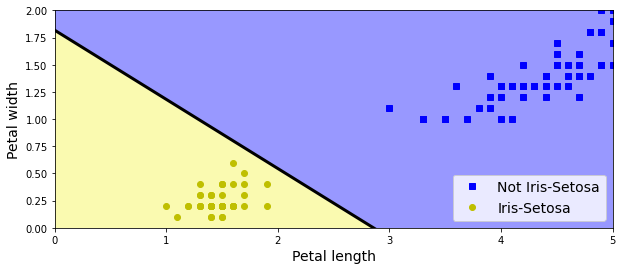

In [3]:
def listing2_3():

    import numpy as np
    from sklearn.datasets import load_iris
    from sklearn.linear_model import Perceptron

    iris = load_iris()
    X = iris.data[:, (2, 3)]  # petal length, petal width
    y = (iris.target == 0).astype(int)

    per_clf = Perceptron(random_state=42)
    per_clf.fit(X, y)
    y_pred = per_clf.predict([[2, 0.5]])
    print(y_pred)
    
    a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
    b = -per_clf.intercept_ / per_clf.coef_[0][1]

    axes = [0, 5, 0, 2]

    x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = per_clf.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(10, 4))
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
    plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

    plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="lower right", fontsize=14)
    plt.axis(axes)

    plt.show()
    
listing2_3()

<a name="2.3.1"></a>
### 2.3.1 Perceptron: Heaviside step function
<a href="#2.0_top">[back to top]</a>

No source code from book.

Source code from Github.

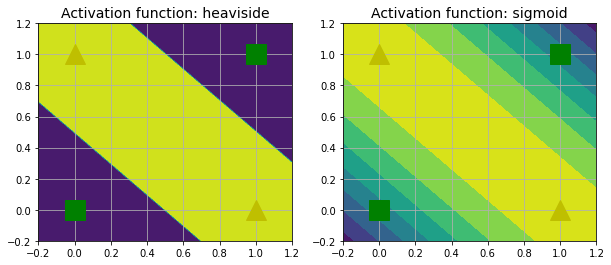

In [4]:
def listing2_4b():

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def heaviside(z):
        return (z >= 0).astype(z.dtype)

    def mlp_xor(x1, x2, activation=heaviside):
        return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)
    
    #####
    
    x1s = np.linspace(-0.2, 1.2, 100)
    x2s = np.linspace(-0.2, 1.2, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    z1 = mlp_xor(x1, x2, activation=heaviside)
    z2 = mlp_xor(x1, x2, activation=sigmoid)

    plt.figure(figsize=(10,4))

    plt.subplot(121)
    plt.contourf(x1, x2, z1)
    plt.plot([0, 1], [0, 1], "gs", markersize=20)
    plt.plot([0, 1], [1, 0], "y^", markersize=20)
    plt.title("Activation function: heaviside", fontsize=14)
    plt.grid(True)

    plt.subplot(122)
    plt.contourf(x1, x2, z2)
    plt.plot([0, 1], [0, 1], "gs", markersize=20)
    plt.plot([0, 1], [1, 0], "y^", markersize=20)
    plt.title("Activation function: sigmoid", fontsize=14)
    plt.grid(True)
    
listing2_4b()

<a name="2.4"></a>
## 2.4 The Multilayer Perceptron and Backpropagation / MLPとバックプロパゲーション
<a href="#2.0_top">[back to top]</a>

No source code from book.

Source code from Github.

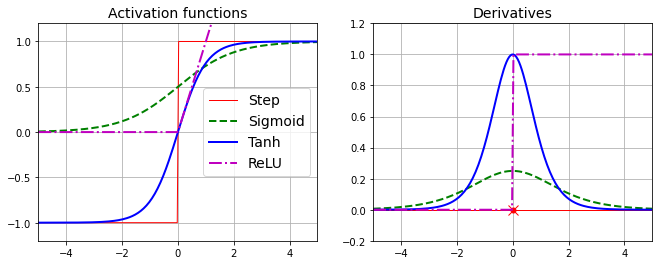

In [5]:
def listing2_4():
    
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def relu(z):
        return np.maximum(0, z)

    def derivative(f, z, eps=0.000001):
        return (f(z + eps) - f(z - eps))/(2 * eps)
    
    #####
    
    z = np.linspace(-5, 5, 200)

    plt.figure(figsize=(11,4))

    plt.subplot(121)
    plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
    plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
    plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
    plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
    plt.grid(True)
    plt.legend(loc="center right", fontsize=14)
    plt.title("Activation functions", fontsize=14)
    plt.axis([-5, 5, -1.2, 1.2])

    plt.subplot(122)
    plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
    plt.plot(0, 0, "ro", markersize=5)
    plt.plot(0, 0, "rx", markersize=10)
    plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
    plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
    plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
    plt.grid(True)
    #plt.legend(loc="center right", fontsize=14)
    plt.title("Derivatives", fontsize=14)
    plt.axis([-5, 5, -0.2, 1.2])

    plt.show()
    
    #####
    
listing2_4()

<a name="2.5"></a>
## 2.5 Regression MLPs / 回帰 MLP
<a href="#2.0_top">[back to top]</a>

No source code.

<a name="2.6"></a>
## 2.6 Classification MLPs / 分類 MLP
<a href="#2.0_top">[back to top]</a>

No source code.

---
<a name="3.0"></a>
# 3. Implementing MLPs with Keras / Kerasによる MLPの実装
<a href="#3.0_top">[back to top]</a>

No source code.

<a name="3.1"></a>
## 3.1 Installing TensorFlow 2 / TensorFlow 2のインストール
<a href="#3.0_top">[back to top]</a>

No source code.

<a name="3.2"></a>
## 3.2 Building an Image Classifier Using the Sequential API / シーケンシャル APIを使った画像分類器の構築
<a href="#3.0_top">[back to top]</a>

(60000, 28, 28)
----------------------------------------
uint8
----------------------------------------


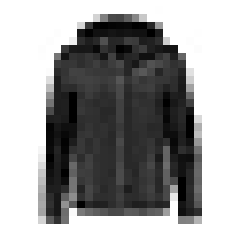

[4 0 7 ... 3 0 5]
Coat
(5000, 28, 28)
(10000, 28, 28)


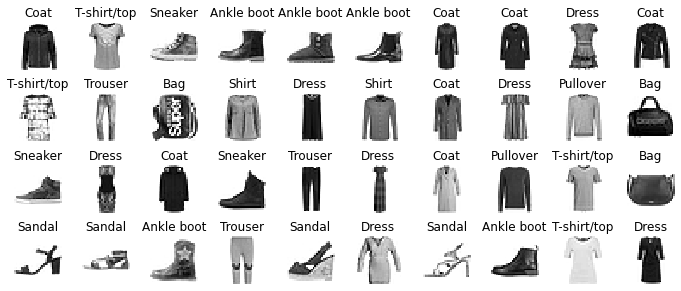

[<keras.layers.core.flatten.Flatten object at 0x1369bd940>, <keras.layers.core.dense.Dense object at 0x1372e3df0>, <keras.layers.core.dense.Dense object at 0x1372eddf0>, <keras.layers.core.dense.Dense object at 0x13731c100>]
----------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-tr

2022-07-23 10:19:18.783556: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None
dense
----------------------------------------
True
[[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

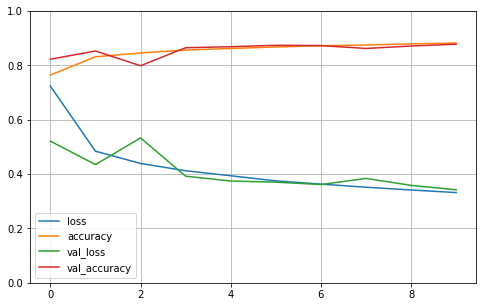

313/313 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8619
[[0.   0.   0.   0.   0.   0.12 0.   0.05 0.   0.82]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
----------------------------------------
[9 2 1]


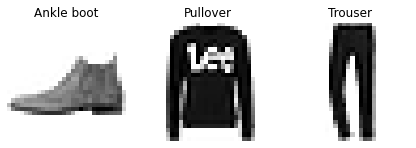

In [6]:
def listing3_2():
    
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    # Using Keras to load the dataset
    fashion_mnist = keras.datasets.fashion_mnist
    (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

    #####
    
    print(X_train_full.shape)
    HR()
    
    print(X_train_full.dtype)
    HR()
    
    ######
    
    # Let's split the full training set into a validation set and a 
    # (smaller) training set. We also scale the pixel intensities down 
    #to the 0-1 range and convert them to floats, by dividing by 255.
    X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
    y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
    X_test = X_test / 255.

    #####
    
    # You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:
    plt.imshow(X_train[0], cmap="binary")
    plt.axis('off')
    plt.show()
    
    ######
    
    # The labels are the class IDs (represented as uint8), from 0 to 9:
    print(y_train)
    
    # Here are the corresponding class names:
    class_names = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]    

    # So the first image in the training set is a coat:
    print(class_names[y_train[0]])
    
    # The validation set contains 5,000 images, and the test set contains 10,000 images:
    print(X_valid.shape)
    print(X_test.shape)
    
    #####
    
    # Let's take a look at a sample of the images in the dataset:
    
    n_rows = 4
    n_cols = 10
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_train[index]], fontsize=12)

    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()
    
    
    # Create the model using the Sequential API
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    print(model.layers)
    HR()
    
    print(model.summary())
    
    #####
    
    keras.utils.plot_model(
        model, 
        "my_fashion_mnist_model.png", 
        show_shapes=True
    )

    hidden1 = model.layers[1]
    print(hidden1.name)
    HR()
    
    print(model.get_layer(hidden1.name) is hidden1)
    
    weights, biases = hidden1.get_weights()
    print(weights)
    print(weights.shape)
    print(biases)
    print(biases.shape)
    
    
    # Compiling the model
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="sgd",
        metrics=["accuracy"]
    )
    
    # Training and evaluating the model
    history = model.fit(
        X_train, 
        y_train, 
        epochs=10, # 30,
        validation_data=(X_valid, y_valid),
        verbose=2
    )
    
    print(history.params)
    print(history.epoch)
    print(history.history.keys())

    
    import pandas as pd

    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
    model.evaluate(X_test, y_test)
    
    
    # Using the model to make predictions
    X_new = X_test[:3]
    y_proba = model.predict(X_new)
    print(y_proba.round(2))
    
    
    y_pred = np.argmax(model.predict(X_new), axis=-1)
    print(y_pred)

    #####
    
    print(np.array(class_names)[y_pred])
    HR()

    y_new = y_test[:3]
    print(y_new)

    plt.figure(figsize=(7.2, 2.4))

    for index, image in enumerate(X_new):
        plt.subplot(1, 3, index + 1)
        plt.imshow(image, cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)

        plt.subplots_adjust(wspace=0.2, hspace=0.5)

    plt.show()
    
listing3_2()

<a name="3.3"></a>
## 3.3 Building a Regression MLP Using the Sequential API / シーケンシャル APIを使った回帰 MLPの構築
<a href="#3.0_top">[back to top]</a>

Epoch 1/3
363/363 - 1s - loss: 1.6419 - accuracy: 0.0028 - val_loss: 0.8560 - val_accuracy: 0.0044 - 802ms/epoch - 2ms/step
Epoch 2/3
363/363 - 0s - loss: 0.7047 - accuracy: 0.0029 - val_loss: 0.6531 - val_accuracy: 0.0044 - 430ms/epoch - 1ms/step
Epoch 3/3
363/363 - 0s - loss: 0.6345 - accuracy: 0.0029 - val_loss: 0.6099 - val_accuracy: 0.0044 - 447ms/epoch - 1ms/step
----------------------------------------
162/162 [==============================] - 0s 1ms/step - loss: 0.6087 - accuracy: 0.0021
[test loss, test accuracy]: [0.6087437272071838, 0.0021317829377949238]
----------------------------------------
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
hist_keys ['loss', 'accuracy', 'val_loss', 'val_accuracy']
----------------------------------------


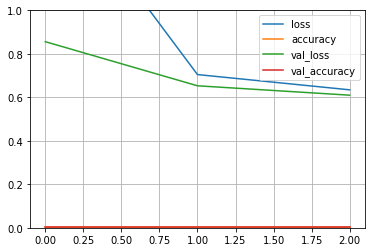

[[0.4826271]
 [1.0099692]
 [2.7501278]]
----------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
def listing3_3():

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    
    #####

    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])

    model.compile(
        loss="mean_squared_error", 
        metrics=['accuracy'],
        optimizer=keras.optimizers.SGD(learning_rate=0.001) # 1e-3
    )

    history = model.fit(
        X_train, 
        y_train, 
        #epochs=50,
        #epochs=20,
        epochs=3,
        validation_data=(X_valid, y_valid),
        verbose=2
    )
    HR()

    # Evaluate the model on the test data
    eval_result = model.evaluate(
        X_test, 
        y_test
    )
    print("[test loss, test accuracy]:", eval_result)
    HR()


    X_new = X_test[:3]

    y_pred = model.predict(X_new)

    ###
    
    import pandas as pd
    
    print(history.history.keys())
    hist_keys = list(history.history.keys())
    print("hist_keys", hist_keys)

    HR()

    # Use Pandas to plot
    pd.DataFrame(history.history)[hist_keys].plot()
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()
    plt.show()

    print(y_pred)

    HR()
    print(model.summary())

listing3_3()

<a name="3.4"></a>
## 3.4 Building Complex Models Using the Functional API / 関数型 APIを使った複雑なモデルの構築
<a href="#3.0_top">[back to top]</a>

<a name="3.4.1"></a>
### 3.4.1 Standard Model
<a href="#3.0_top">[back to top]</a>

In [8]:
def listing3_4_1():
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]
    
    ###
    
    # Model
    input_ = keras.layers.Input(shape=X_train.shape[1:])
    hidden1 = keras.layers.Dense(30, activation="relu")(input_)
    hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
    concat = keras.layers.concatenate([input_, hidden2])
    output = keras.layers.Dense(1)(concat)
    model = keras.models.Model(inputs=[input_], outputs=[output])
    
    model.summary()
    
    model.compile(
        loss="mean_squared_error", 
        optimizer=keras.optimizers.SGD(learning_rate=0.001) # 1e-3
    )

    history = model.fit(
        X_train, 
        y_train, 
        epochs=20,
        validation_data=(X_valid, y_valid),
        verbose=2
    )
    HR()
    
    mse_test = model.evaluate(X_test, y_test)
    print("mse_test:")
    print(mse_test)
    HR()
    
    y_pred = model.predict(X_new)
    print(y_pred)
    
listing3_4_1()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

<a name="3.4.2"></a>
### 3.4.2 Multiple Inputs Model
<a href="#3.0_top">[back to top]</a>

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [9]:
def listing3_4_2():
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]
    
    ###
    
    # Model
    input_A = keras.layers.Input(shape=[5], name="wide_input")
    input_B = keras.layers.Input(shape=[6], name="deep_input")

    hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
    hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

    concat = keras.layers.concatenate([input_A, hidden2])
    output = keras.layers.Dense(1, name="output")(concat)

    model = keras.models.Model(
        inputs=[input_A, input_B], 
        outputs=[output]
    )

    model.summary()
    
    model.compile(
        loss="mse", 
        optimizer=keras.optimizers.SGD(learning_rate=0.001)  # 1e-3
    )

    X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
    X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
    X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
    X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

    history = model.fit(
        (X_train_A, X_train_B), 
        y_train, 
        epochs=20,
        validation_data=((X_valid_A, X_valid_B), y_valid),
        verbose=2
    )
    HR()
    
    mse_test = model.evaluate(
        (X_test_A, X_test_B), 
        y_test
    )
    HR()
    
    y_pred = model.predict((X_new_A, X_new_B))
    print(y_pred)

listing3_4_2()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

<a name="3.4.3"></a>
### 3.4.3  Multiple Outputs Model, add Auxiliary Output for Regularization
<a href="#3.0_top">[back to top]</a>

In [10]:
def listing3_4_3():
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]

    X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
    X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
    X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
    X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
    
    ###

    input_A = keras.layers.Input(shape=[5], name="wide_input")
    input_B = keras.layers.Input(shape=[6], name="deep_input")
    hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
    hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    output = keras.layers.Dense(1, name="main_output")(concat)
    aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

    model = keras.models.Model(
        inputs=[input_A, input_B],
        outputs=[output, aux_output]
    )

    model.compile(
        loss=["mse", "mse"], 
        loss_weights=[0.9, 0.1], 
        optimizer=keras.optimizers.SGD(learning_rate=0.001)
    )

    history = model.fit(
        [X_train_A, X_train_B], 
        [y_train, y_train], 
        epochs=20,
        validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
        verbose=2
    )
    HR()
    
    total_loss, main_loss, aux_loss = model.evaluate(
        [X_test_A, X_test_B], 
        [y_test, y_test]
    )
    HR()
    
    y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

    print(y_pred_main)
    HR()
    print(y_pred_aux)

listing3_4_3()

Epoch 1/20
363/363 - 1s - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117 - 1s/epoch - 3ms/step
Epoch 2/20
363/363 - 1s - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109 - 512ms/epoch - 1ms/step
Epoch 3/20
363/363 - 1s - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326 - 560ms/epoch - 2ms/step
Epoch 4/20
363/363 - 1s - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552 - 526ms/epoch - 1ms/step
Epoch 5/20
363/363 - 1s - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss: 1.2177 - val_main_output_loss: 0.5194 - val_aux_output_loss: 7.5030 - 563ms/epoch - 2ms/step
Epoch 6/20
363/363

<a name="3.5"></a>
## 3.5 Using the Subclassing API to Build Dynamic Models / サブクラス化 APIを使ったダイナミックなモデルの構築
<a href="#3.0_top">[back to top]</a>

In [11]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [12]:
def listing3_5():

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]

    X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
    X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
    X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
    X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
    
    ###
    
    model = WideAndDeepModel(30, activation="relu")

    model.compile(
        loss="mse", 
        loss_weights=[0.9, 0.1], 
        optimizer=keras.optimizers.SGD(learning_rate=1e-3)
    )

    history = model.fit(
        (X_train_A, X_train_B), 
        (y_train, y_train), 
        epochs=10,
        validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)),
        verbose=2
    )
    HR()
    
    total_loss, main_loss, aux_loss = model.evaluate(
        (X_test_A, X_test_B), 
        (y_test, y_test)
    )
    HR()
    
    y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
    
    print(y_pred_main)
    HR()
    print(y_pred_aux)
    
listing3_5()

Epoch 1/10
363/363 - 1s - loss: 2.1365 - output_1_loss: 1.9196 - output_2_loss: 4.0890 - val_loss: 1.6233 - val_output_1_loss: 0.8468 - val_output_2_loss: 8.6117 - 1s/epoch - 3ms/step
Epoch 2/10
363/363 - 1s - loss: 0.8905 - output_1_loss: 0.6969 - output_2_loss: 2.6326 - val_loss: 1.5163 - val_output_1_loss: 0.6836 - val_output_2_loss: 9.0109 - 517ms/epoch - 1ms/step
Epoch 3/10
363/363 - 1s - loss: 0.7429 - output_1_loss: 0.6088 - output_2_loss: 1.9499 - val_loss: 1.4639 - val_output_1_loss: 0.6229 - val_output_2_loss: 9.0326 - 540ms/epoch - 1ms/step
Epoch 4/10
363/363 - 1s - loss: 0.6771 - output_1_loss: 0.5691 - output_2_loss: 1.6485 - val_loss: 1.3388 - val_output_1_loss: 0.5481 - val_output_2_loss: 8.4552 - 542ms/epoch - 1ms/step
Epoch 5/10
363/363 - 1s - loss: 0.6381 - output_1_loss: 0.5434 - output_2_loss: 1.4911 - val_loss: 1.2177 - val_output_1_loss: 0.5194 - val_output_2_loss: 7.5030 - 521ms/epoch - 1ms/step
Epoch 6/10
363/363 - 1s - loss: 0.6079 - output_1_loss: 0.5207 - out

<a name="3.6"></a>
## 3.6 Saving and Restoring a Model / モデルの保存と復元

<a href="#3.0_top">[back to top]</a>

<a name="3.6.1"></a>
### 3.6.1 Saving a Model

* モデルの保存

<a href="#3.0_top">[back to top]</a>

In [13]:
# May need for cleanup
!rm -r {DATA_ROOT}

In [14]:
def listing3_6_1():
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]
    
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1)
    ])

    model.compile(
        loss="mse", 
        optimizer=keras.optimizers.SGD(learning_rate=0.001) # 1e-3
    )

    history = model.fit(
        X_train, 
        y_train, 
        epochs=10, 
        validation_data=(X_valid, y_valid),
        verbose=2
    )
    HR()
    
    mse_test = model.evaluate(X_test, y_test)
    HR()
    
    model.save(f"{DATA_ROOT}/listing2_6_1/my_keras_model.h5")

    print(model.predict(X_new))
    HR()
    
    model.save_weights(f"{DATA_ROOT}/listing2_6_1/my_keras_weights.ckpt")
        
listing3_6_1()

Epoch 1/10
363/363 - 1s - loss: 1.8866 - val_loss: 0.7126 - 803ms/epoch - 2ms/step
Epoch 2/10
363/363 - 0s - loss: 0.6577 - val_loss: 0.6880 - 431ms/epoch - 1ms/step
Epoch 3/10
363/363 - 0s - loss: 0.5934 - val_loss: 0.5803 - 457ms/epoch - 1ms/step
Epoch 4/10
363/363 - 0s - loss: 0.5557 - val_loss: 0.5166 - 479ms/epoch - 1ms/step
Epoch 5/10
363/363 - 0s - loss: 0.5272 - val_loss: 0.4895 - 437ms/epoch - 1ms/step
Epoch 6/10
363/363 - 0s - loss: 0.5033 - val_loss: 0.4951 - 426ms/epoch - 1ms/step
Epoch 7/10
363/363 - 0s - loss: 0.4854 - val_loss: 0.4861 - 434ms/epoch - 1ms/step
Epoch 8/10
363/363 - 0s - loss: 0.4709 - val_loss: 0.4554 - 431ms/epoch - 1ms/step
Epoch 9/10
363/363 - 0s - loss: 0.4578 - val_loss: 0.4413 - 434ms/epoch - 1ms/step
Epoch 10/10
363/363 - 0s - loss: 0.4474 - val_loss: 0.4379 - 430ms/epoch - 1ms/step
----------------------------------------
162/162 [==============================] - 0s 1ms/step - loss: 0.4382
----------------------------------------
[[0.5400236]
 [1.

<a name="3.6.1"></a>
### 3.6.2 Restoring a Model

* モデルの復元

<a href="#3.0_top">[back to top]</a>

In [15]:
def listing3_6_1():
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]
    
    ###
    
    model = keras.models.load_model(f"{DATA_ROOT}/listing2_6_1/my_keras_model.h5")

    print(model.predict(X_new))
    
listing3_6_1()

[[0.5400236]
 [1.6505971]
 [3.0098243]]


<a name="3.7"></a>
## 3.7 Using Callbacks / コールバックの使い方

<a href="#3.0_top">[back to top]</a>

<a name="3.7.1"></a>
### 3.7.1 ModelCheckpoint callback
<a href="#3.0_top">[back to top]</a>

In [16]:
def listing3_7_1():
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    ###
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]
    
    ###
    
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1)
    ])   

    model.compile(
        loss="mse", 
        optimizer=keras.optimizers.SGD(learning_rate=0.001)
    )

    checkpoint_cb = keras.callbacks.ModelCheckpoint(
        f"{DATA_ROOT}/listing2_7_1/my_keras_model.h5", 
        save_best_only=True
    )

    history = model.fit(
        X_train, 
        y_train, 
        epochs=10,
        validation_data=(X_valid, y_valid),                
        callbacks=[checkpoint_cb],
        verbose=2
    )
    HR()
    
    model = keras.models.load_model(f"{DATA_ROOT}/listing2_7_1/my_keras_model.h5") # rollback to best model

    mse_test = model.evaluate(X_test, y_test)
    
listing3_7_1()

Epoch 1/10
363/363 - 1s - loss: 1.8866 - val_loss: 0.7126 - 774ms/epoch - 2ms/step
Epoch 2/10
363/363 - 0s - loss: 0.6577 - val_loss: 0.6880 - 454ms/epoch - 1ms/step
Epoch 3/10
363/363 - 0s - loss: 0.5934 - val_loss: 0.5803 - 465ms/epoch - 1ms/step
Epoch 4/10
363/363 - 0s - loss: 0.5557 - val_loss: 0.5166 - 485ms/epoch - 1ms/step
Epoch 5/10
363/363 - 0s - loss: 0.5272 - val_loss: 0.4895 - 451ms/epoch - 1ms/step
Epoch 6/10
363/363 - 0s - loss: 0.5033 - val_loss: 0.4951 - 452ms/epoch - 1ms/step
Epoch 7/10
363/363 - 0s - loss: 0.4854 - val_loss: 0.4861 - 452ms/epoch - 1ms/step
Epoch 8/10
363/363 - 1s - loss: 0.4709 - val_loss: 0.4554 - 517ms/epoch - 1ms/step
Epoch 9/10
363/363 - 0s - loss: 0.4578 - val_loss: 0.4413 - 473ms/epoch - 1ms/step
Epoch 10/10
363/363 - 0s - loss: 0.4474 - val_loss: 0.4379 - 475ms/epoch - 1ms/step
----------------------------------------
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


<a name="2.7.2"></a>
### 2.7.2 EarlyStopping callback
<a href="#2.0_top">[back to top]</a>

In [17]:
def listing3_7_2():
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    ###
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]
    
    ###  

    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1)
    ])   
    
    model.compile(
        loss="mse", 
        optimizer=keras.optimizers.SGD(learning_rate=0.001)
    ) 
    
    checkpoint_cb = keras.callbacks.ModelCheckpoint(
        "chp10/listing2_7_2/my_keras_model.h5", 
        save_best_only=True
    )
    
    early_stopping_cb = keras.callbacks.EarlyStopping(
        patience=10,                                                  
        restore_best_weights=True
    )

    history = model.fit(
        X_train, 
        y_train, 
        epochs=100,  
        validation_data=(X_valid, y_valid),
        callbacks=[checkpoint_cb, early_stopping_cb],
        verbose=2
    )
    HR()
    
    mse_test = model.evaluate(
        X_test, 
        y_test
    )
    print(mse_test)
    
listing3_7_2()

Epoch 1/100
363/363 - 1s - loss: 1.8866 - val_loss: 0.7126 - 1s/epoch - 3ms/step
Epoch 2/100
363/363 - 0s - loss: 0.6577 - val_loss: 0.6880 - 444ms/epoch - 1ms/step
Epoch 3/100
363/363 - 0s - loss: 0.5934 - val_loss: 0.5803 - 445ms/epoch - 1ms/step
Epoch 4/100
363/363 - 0s - loss: 0.5557 - val_loss: 0.5166 - 442ms/epoch - 1ms/step
Epoch 5/100
363/363 - 0s - loss: 0.5272 - val_loss: 0.4895 - 445ms/epoch - 1ms/step
Epoch 6/100
363/363 - 0s - loss: 0.5033 - val_loss: 0.4951 - 457ms/epoch - 1ms/step
Epoch 7/100
363/363 - 0s - loss: 0.4854 - val_loss: 0.4861 - 470ms/epoch - 1ms/step
Epoch 8/100
363/363 - 0s - loss: 0.4709 - val_loss: 0.4554 - 477ms/epoch - 1ms/step
Epoch 9/100
363/363 - 0s - loss: 0.4578 - val_loss: 0.4413 - 454ms/epoch - 1ms/step
Epoch 10/100
363/363 - 0s - loss: 0.4474 - val_loss: 0.4379 - 466ms/epoch - 1ms/step
Epoch 11/100
363/363 - 0s - loss: 0.4393 - val_loss: 0.4396 - 449ms/epoch - 1ms/step
Epoch 12/100
363/363 - 0s - loss: 0.4318 - val_loss: 0.4507 - 455ms/epoch - 1

<a name="3.7.3"></a>
### 3.7.3 Custom callback
<a href="#3.0_top">[back to top]</a>

In [18]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print(f"Custom callback -- val/train: {logs['val_loss'] / logs['loss'] }")

In [19]:
def listing3_7_3():

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
        
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]
    
    ###  

    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1)
    ])   

    val_train_ratio_cb = PrintValTrainRatioCallback()

    model.compile(
        loss="mse", 
        optimizer=keras.optimizers.SGD(learning_rate=0.001)
    ) 
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=10,
        validation_data=(X_valid, y_valid),
        callbacks=[val_train_ratio_cb],
        verbose=0
    )

    HR()
    
    mse_test = model.evaluate(
        X_test, 
        y_test
    )
    print(mse_test)

listing3_7_3()

Custom callback -- val/train: 0.37771147877381933
Custom callback -- val/train: 1.0460628888001982
Custom callback -- val/train: 0.9779414460414522
Custom callback -- val/train: 0.9296216409858185
Custom callback -- val/train: 0.9285212456735825
Custom callback -- val/train: 0.9836711735717436
Custom callback -- val/train: 1.001586225571555
Custom callback -- val/train: 0.9670048647618975
Custom callback -- val/train: 0.9640402395698565
Custom callback -- val/train: 0.9785828118862949
----------------------------------------
162/162 [==============================] - 0s 2ms/step - loss: 0.4382
0.43822869658470154


---
<a name="3.8"></a>
# 3.8 Using TensorBoard for Visualization / TensorBoardを使った可視化

<a href="#3.0_top">[back to top]</a>

Skipped for now.

---
<a name="4.0"></a>
# 4. Hyperparameter Tuning
<a href="#4.0_top">[back to top]</a>

<a name="4.1"></a>
## 4.1 Grid search using KerasRegressor
<a href="#4.0_top">[back to top]</a>

In [20]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=0.003, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [21]:
def listing4_1():

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    ###
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]

    ###
    
    keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

    keras_reg.fit(
        X_train, 
        y_train, 
        # epochs=100,
        epochs=20,
        validation_data=(X_valid, y_valid),
        callbacks=[keras.callbacks.EarlyStopping(patience=10)],
        verbose=2
    )
    HR()

    mse_test = keras_reg.score(X_test, y_test)
    print(mse_test)
    HR()
    
    y_pred = keras_reg.predict(X_new)
    print(y_pred)

listing4_1()

Epoch 1/20


/var/folders/vb/glk9sq0x22qbdp2r6prn8h600000gn/T/ipykernel_8657/422274344.py:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


363/363 - 1s - loss: 1.0896 - val_loss: 20.7721 - 755ms/epoch - 2ms/step
Epoch 2/20
363/363 - 0s - loss: 0.7606 - val_loss: 5.0266 - 451ms/epoch - 1ms/step
Epoch 3/20
363/363 - 0s - loss: 0.5456 - val_loss: 0.5490 - 456ms/epoch - 1ms/step
Epoch 4/20
363/363 - 0s - loss: 0.4732 - val_loss: 0.4529 - 455ms/epoch - 1ms/step
Epoch 5/20
363/363 - 0s - loss: 0.4503 - val_loss: 0.4188 - 414ms/epoch - 1ms/step
Epoch 6/20
363/363 - 0s - loss: 0.4338 - val_loss: 0.4129 - 437ms/epoch - 1ms/step
Epoch 7/20
363/363 - 0s - loss: 0.4241 - val_loss: 0.4004 - 435ms/epoch - 1ms/step
Epoch 8/20
363/363 - 0s - loss: 0.4168 - val_loss: 0.3944 - 444ms/epoch - 1ms/step
Epoch 9/20
363/363 - 0s - loss: 0.4108 - val_loss: 0.3961 - 481ms/epoch - 1ms/step
Epoch 10/20
363/363 - 0s - loss: 0.4060 - val_loss: 0.4071 - 474ms/epoch - 1ms/step
Epoch 11/20
363/363 - 0s - loss: 0.4021 - val_loss: 0.3855 - 476ms/epoch - 1ms/step
Epoch 12/20
363/363 - 0s - loss: 0.3984 - val_loss: 0.4136 - 432ms/epoch - 1ms/step
Epoch 13/20

<a name="4.2"></a>
## 4.2 Randomized search using RandomizedSearchCV
<a href="#4.0_top">[back to top]</a>

In [22]:
def listing4_2():

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    ###
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target, 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    X_new = X_test[:3]

    ###
    
    from scipy.stats import reciprocal
    from sklearn.model_selection import RandomizedSearchCV

    param_distribs = {
        "n_hidden": [0, 1, 2, 3],
        "n_neurons": np.arange(1, 100)               .tolist(),
        "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
    }
    
    keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
    
    rnd_search_cv = RandomizedSearchCV(
        keras_reg, 
        param_distribs, 
        n_iter=10, 
        cv=3, 
        verbose=0
    )

    rnd_search_cv.fit(
        X_train, 
        y_train, 
        epochs=30, # 100
        validation_data=(X_valid, y_valid),
        callbacks=[keras.callbacks.EarlyStopping(patience=2)],
        verbose=0
    )
    HR()
    
    ###
    
    print(rnd_search_cv.best_params_)
    HR()
    
    print(rnd_search_cv.best_score_)
    HR()
    
    print(rnd_search_cv.best_estimator_)
    HR()
    
    print(rnd_search_cv.score(X_test, y_test))
    HR()

    model_best = rnd_search_cv.best_estimator_.model
    print(model_best)
    
    model_best.evaluate(X_test, y_test)
    
listing4_2()

/var/folders/vb/glk9sq0x22qbdp2r6prn8h600000gn/T/ipykernel_8657/1255103819.py:44: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


121/121 [==============================] - 0s 1ms/step - loss: 0.3801
----------------------------------------
{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}
----------------------------------------
-0.3637506365776062
----------------------------------------
----------------------------------------
162/162 [==============================] - 0s 1ms/step - loss: 0.3440
-0.34396177530288696
----------------------------------------
162/162 [==============================] - 0s 1ms/step - loss: 0.3440


<a name="4.3"></a>
## 4.3 Number of Hidden Layers
<a href="#4.0_top">[back to top]</a>

No source code.

<a name="4.4"></a>
## 4.4 Number of Neurons per Hidden Layer
<a href="#4.0_top">[back to top]</a>

No source code.

<a name="4.5"></a>
## 4.5 Learning Rate, Batch Size, and Other Hyperparameters
<a href="#4.0_top">[back to top]</a>

No source code.